# Chapter 2
## PyTorch Basic ConceptsChapter 05

In [1]:
import torch

In [2]:
def get_function(x1_val = 0, x2_val = 0, x3_val = 0, x4_val = 0):
    # variables
    x1 = torch.tensor(x1_val, requires_grad = True, dtype = torch.float32)
    x2 = torch.tensor(x2_val, requires_grad = True, dtype = torch.float32)
    x3 = torch.tensor(x3_val, requires_grad = True, dtype = torch.float32)
    x4 = torch.tensor(x3_val, requires_grad = True, dtype = torch.float32)
    
    # function
    p1 = x1.pow(3)
    m1 = p1 * x2
    m2 = x3 * x4
    f = m1 + m2
    vars = {'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4}
    
    return f, vars

In [3]:
f, _ = get_function(2,4,3,5)
print (f)
print (f.item())

tensor(41., grad_fn=<AddBackward0>)
41.0


### ---- next exercise

In [4]:
, formatfrom ch2.dfdx.function import get_function
from torchviz import make_dot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## create computational graph

In [5]:
f, params = get_function(2,4,3,5)
make_dot(f, params).render("f_torchvis", format="png")
img = mpimg.imread('f_torchvis.png')

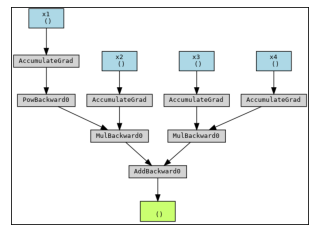

In [6]:
plt.xticks([])
plt.yticks([])
plt.imshow(img)

## Partial Derivative

In [10]:
from ch2.dfdx.function import get_function
from torch.autograd import grad


In [11]:
f, params = get_function(2,4,3,5)

In [12]:
# function f
# partial deriv with respect to x1

# NOTE - you can't run this twice
df_dx1 = grad(outputs = f, inputs = [params['x1']])
print (df_dx1)

(tensor(48.),)


## calculate gradient - full derivative df/dx

In [1]:
from ch2.dfdx.function import get_function
from torch.autograd import grad

In [2]:
f, params = get_function(2, 4, 3, 5)

In [5]:
print (f'params: {params}')

params: {'x1': tensor(2., requires_grad=True), 'x2': tensor(4., requires_grad=True), 'x3': tensor(3., requires_grad=True), 'x4': tensor(5., requires_grad=True)}


In [7]:
print (f'params values: {params.values()}')

params values: dict_values([tensor(2., requires_grad=True), tensor(4., requires_grad=True), tensor(3., requires_grad=True), tensor(5., requires_grad=True)])


In [8]:
df_dx = grad(outputs = f, inputs = params.values())
print (df_dx)

(tensor(48.), tensor(8.), tensor(5.), tensor(3.))


## Tensor Creation

In [13]:
import torch

In [14]:
x = torch.tensor(data = [1,2,3])
print (x)

tensor([1, 2, 3])


In [15]:
x2D = torch.tensor(data = [[1,2,3], [4,5,6]])
print (x2D)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [17]:
xF32 = torch.tensor(data = [1.3, 0.5], dtype = torch.float32)
print (xF32)

tensor([1.3000, 0.5000])


In [18]:
xF32g = torch.tensor(data = [1.3, 0.5], dtype = torch.float32, requires_grad=True)
print (xF32g)

tensor([1.3000, 0.5000], requires_grad=True)


## 2-D Convolution

In [20]:
import torch
from torch.nn.parameter import Parameter

In [22]:
A = torch.tensor([[[[1, 2, 0, 1],
                    [-1, 0, 3, 2],
                    [1, 3, 0, 1],
                    [2, -2, 1, 0]]]]).float()
print (A)

tensor([[[[ 1.,  2.,  0.,  1.],
          [-1.,  0.,  3.,  2.],
          [ 1.,  3.,  0.,  1.],
          [ 2., -2.,  1.,  0.]]]])


In [25]:
conv2d = torch.nn.Conv2d(1,1, kernel_size=2, bias=False)
conv2d.weight = Parameter(torch.tensor([[[[1,-1], [-1,1]]]]).float())

In [26]:
output = conv2d(A)

In [27]:
print (output)

tensor([[[[ 0.,  5., -2.],
          [ 1., -6.,  2.],
          [-6.,  6., -2.]]]], grad_fn=<ThnnConv2DBackward0>)


## Loss Function

In [28]:
import torch

In [33]:
a = torch.tensor([1,2]).float()
b = torch.tensor([1,8]).float()

In [34]:
abs_loss = torch.nn.L1Loss()
print (abs_loss)

L1Loss()


In [35]:
abs_error = abs_loss(a,b)
print (abs_error)

tensor(3.)


In [36]:
print(f'abs: {abs_error.item()}')

abs: 3.0
